In [51]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

In [52]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [53]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [54]:
import pandas as pd

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [55]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [56]:
X = df
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [57]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [58]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [59]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

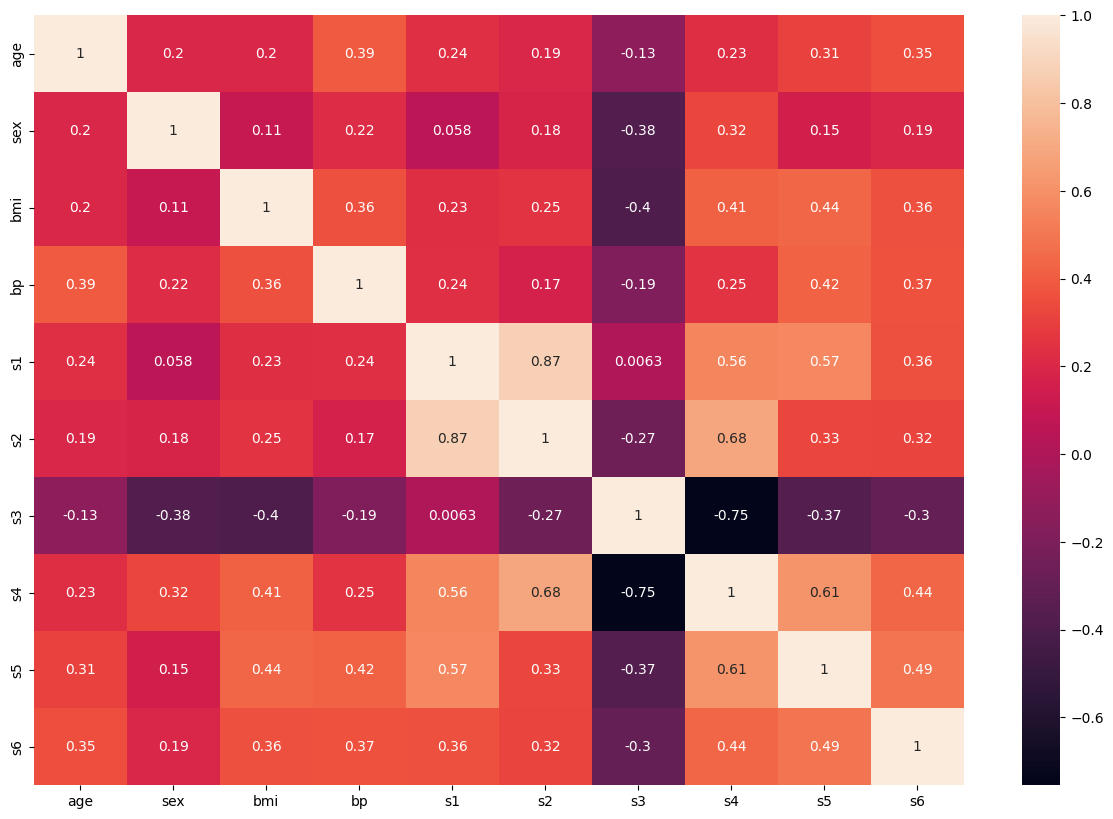

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), annot=True)

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Train the decision tree regressor on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### HyperParameter Tuning

In [62]:
param = {
    'criterion': ['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth': [1,2,3,4,5,10,20,25],
    'max_features': ['auto','sqrt','log2']
}

In [63]:
from sklearn.model_selection import GridSearchCV    
regressor = DecisionTreeRegressor()

In [64]:
import warnings
warnings.filterwarnings('ignore')
grid = GridSearchCV(regressor, param_grid=param, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [65]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [66]:
grid.best_score_

np.float64(-4145.6632006015225)

In [67]:
y_pred = grid.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [69]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.21220711588823238
4984.894261664988
58.85280332494754


In [72]:
selectmodel = DecisionTreeRegressor( criterion= 'friedman_mse',max_depth= 3, max_features= 'sqrt',splitter= 'random')

In [74]:
selectmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', splitter='random')

[Text(0.5, 0.875, 'x[9] <= 0.108\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[0] <= 0.02\nfriedman_mse = 5542.427\nsamples = 302\nvalue = 150.172'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 0.06\nfriedman_mse = 5301.802\nsamples = 193\nvalue = 136.71'),
 Text(0.0625, 0.125, 'friedman_mse = 4462.299\nsamples = 177\nvalue = 129.328'),
 Text(0.1875, 0.125, 'friedman_mse = 7316.734\nsamples = 16\nvalue = 218.375'),
 Text(0.375, 0.375, 'x[2] <= -0.006\nfriedman_mse = 5079.385\nsamples = 109\nvalue = 174.009'),
 Text(0.3125, 0.125, 'friedman_mse = 3065.032\nsamples = 46\nvalue = 140.522'),
 Text(0.4375, 0.125, 'friedman_mse = 5133.518\nsamples = 63\nvalue = 198.46'),
 Text(0.75, 0.625, 'x[7] <= 0.036\nfriedman_mse = 2497.959\nsamples = 7\nvalue = 263.429'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 0.025\nfriedman_mse = 4284.222\nsamples = 3\nvalue = 244.333'),
 Text(0.5625, 0.125, 'friedman_mse = 441.0\nsamples = 2\nva

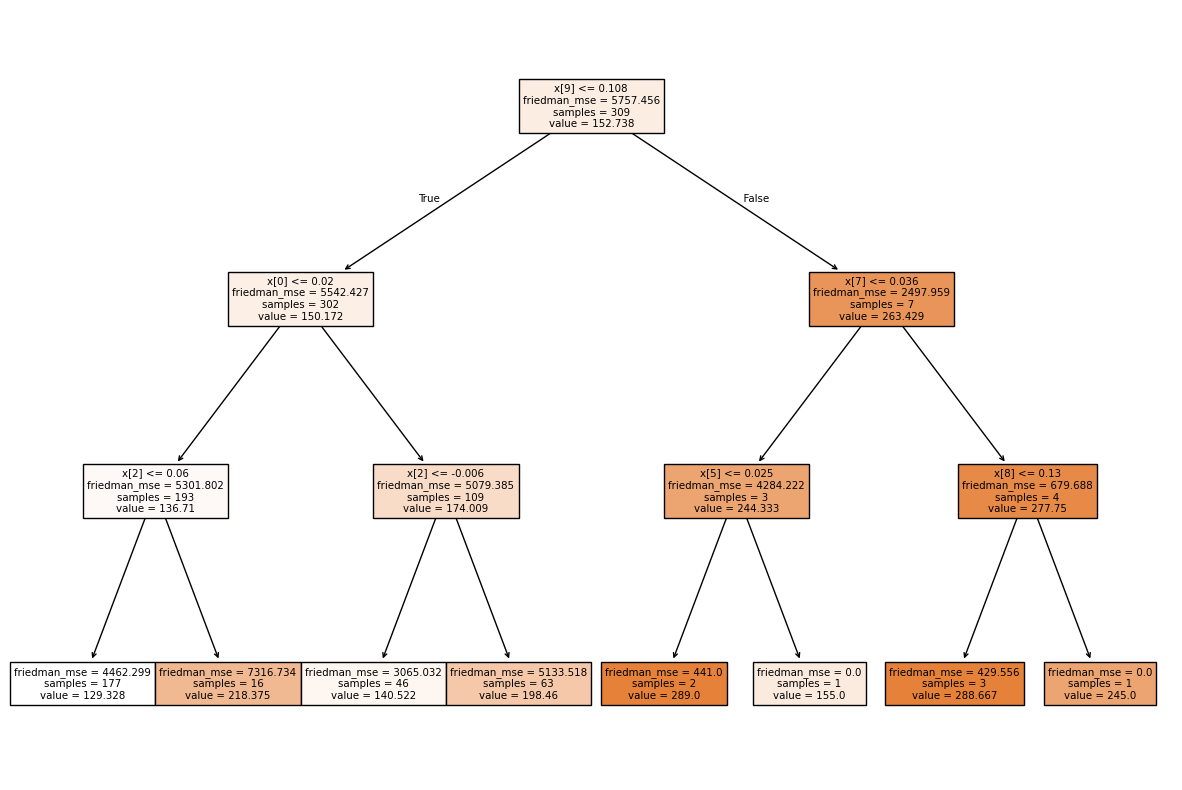

In [77]:
## Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(selectmodel, filled=True)